In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df=pd.read_csv('/content/Copy of heart_disease.csv')

In [3]:
df['num'].replace(2,1,inplace=True)

In [4]:
df['num'].replace(3,1,inplace=True)

In [5]:
df['num'].replace(4,1,inplace=True)

In [6]:
df['num'].unique()

array([0, 1])

In [7]:
df['exang'].unique()

array(['FALSE', 'TRUE', 'TURE'], dtype=object)

In [8]:
df['exang'].replace('TURE','TRUE',inplace=True)

In [9]:
i=df.columns
j=[]
for i in df.columns:
  if dict(df.dtypes)[i]!='object':
    j.append(i)

In [10]:
df[df[j]<0].sum()

,0
age,0.0
sex,0
cp,0
trestbps,0.0
chol,0.0
fbs,0
restecg,0
thalch,0.0
exang,0
oldpeak,-12.7


In [11]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [12]:
import numpy as np


In [13]:
df['oldpeak']=np.abs(df['oldpeak'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [15]:
df.nunique()

,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,2
oldpeak,43


In [16]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [17]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 13)


In [18]:
df = df.drop_duplicates()

In [19]:
data_na = (df.isnull().sum() / len(df)) * 100


In [20]:
data_na

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalch,0.000000
exang,0.000000
oldpeak,6.828194


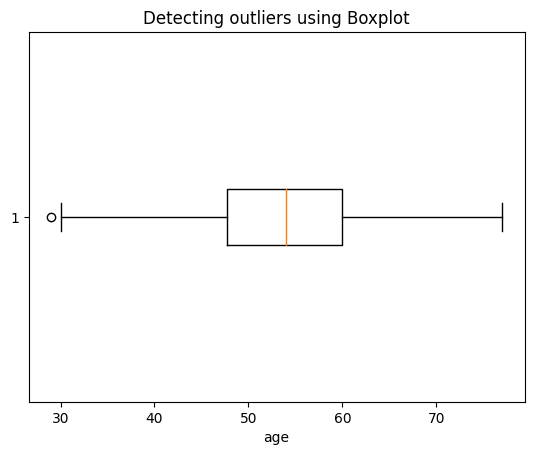

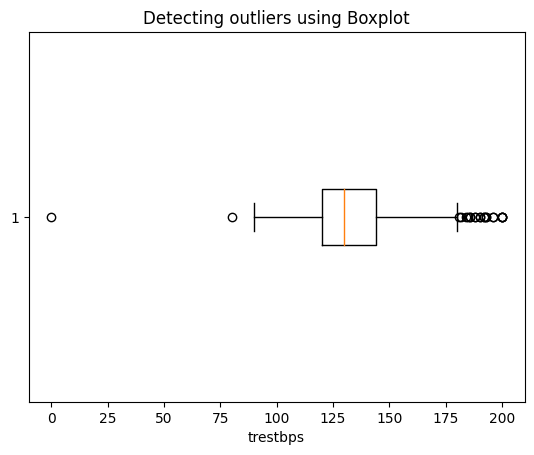

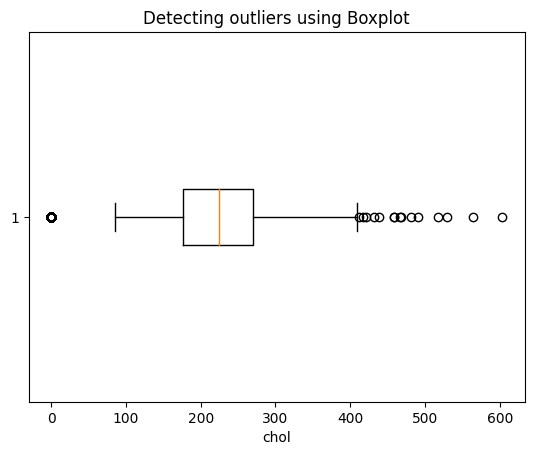

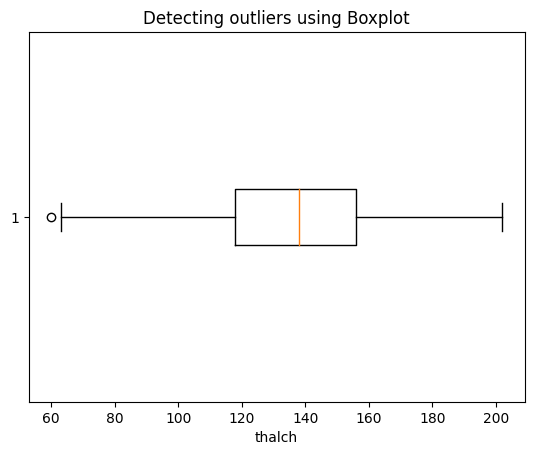

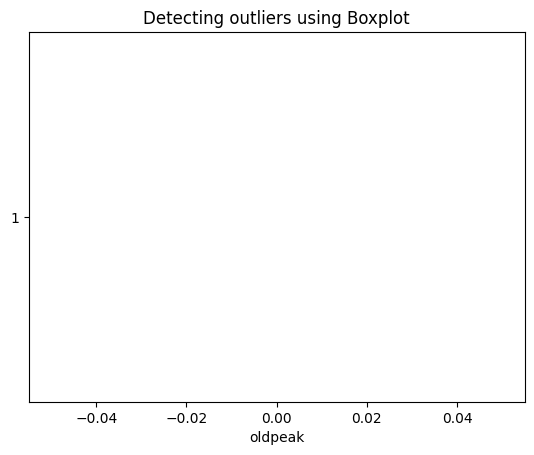

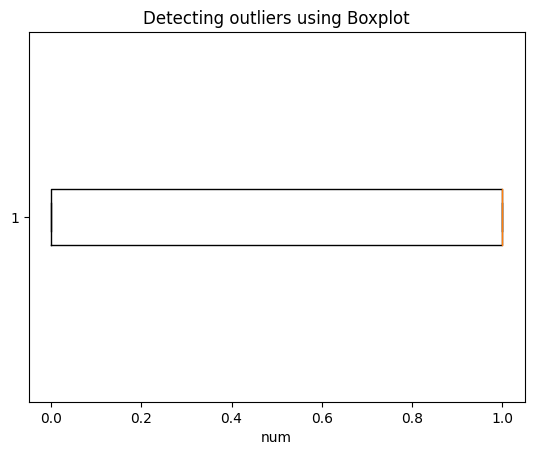

In [21]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [22]:
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
oldpeak,6.828194


In [23]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [24]:
df['oldpeak'].unique()

array([2.3, 0. , 0.4, 1.5, 1. , nan, 2.6, 0.5, 1.2, 3.5, 1.4, 1.1, 0.6,
       2. , 1.6, 0.1, 0.3, 1.3, 0.2, 2.4, 1.8, 3. , 0.8, 1.9, 0.9, 0.7,
       4.2, 2.1, 3.6, 1.7, 3.1, 2.2, 2.5, 2.8, 4. , 5. , 3.4, 3.2, 6.2,
       5.6, 2.9, 3.7, 4.4, 3.8])

In [25]:
df['exang'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [26]:
df['oldpeak'].nunique()

43

In [27]:
import numpy as np
df['oldpeak'].replace('?',np.nan,inplace=True)

In [28]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [29]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [30]:
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

In [31]:
df['oldpeak']

,oldpeak
0,2.300000
1,0.000000
2,0.400000
3,0.000000
4,1.500000
5,2.300000
6,1.000000
7,0.000000
8,0.000000
9,0.921277


In [32]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [33]:
df.nunique()

,0
age,49
sex,2
cp,4
trestbps,85
chol,228
fbs,2
restecg,3
thalch,122
exang,2
oldpeak,44


In [34]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


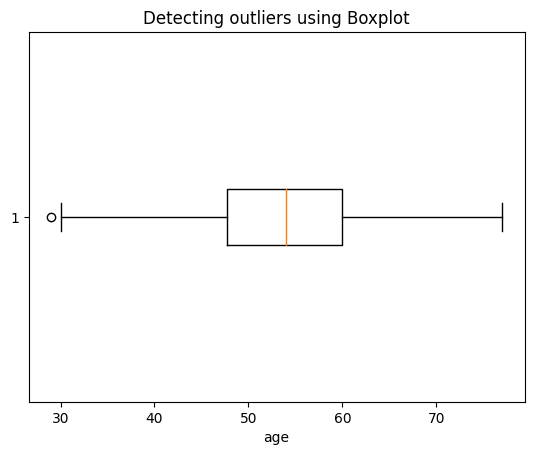

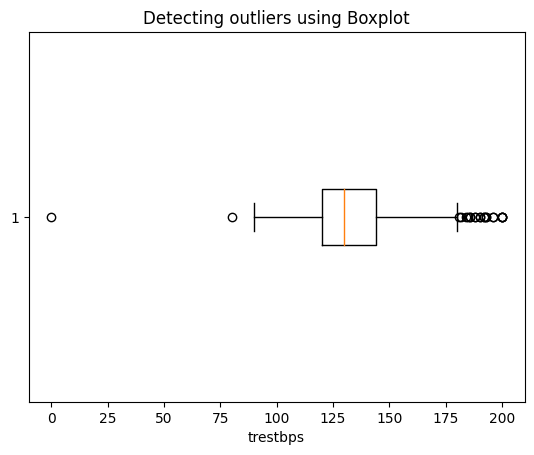

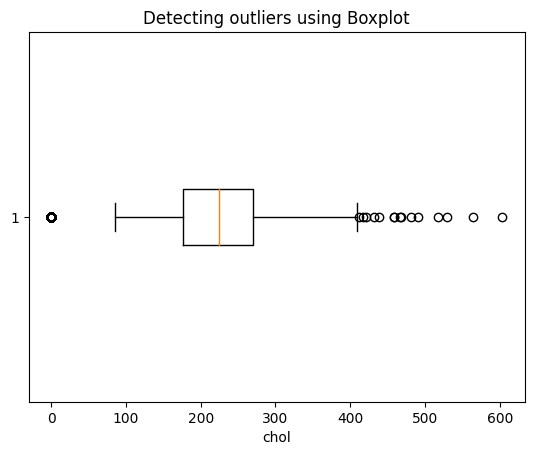

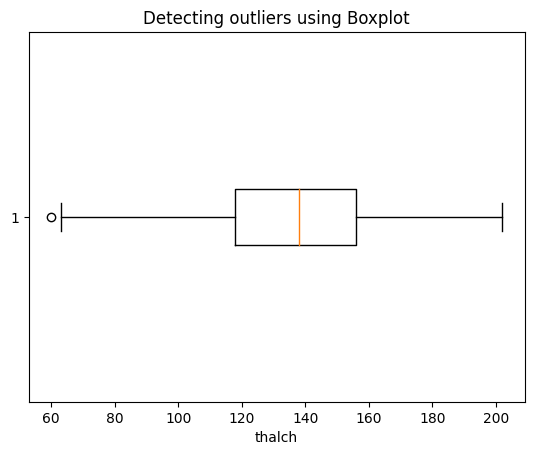

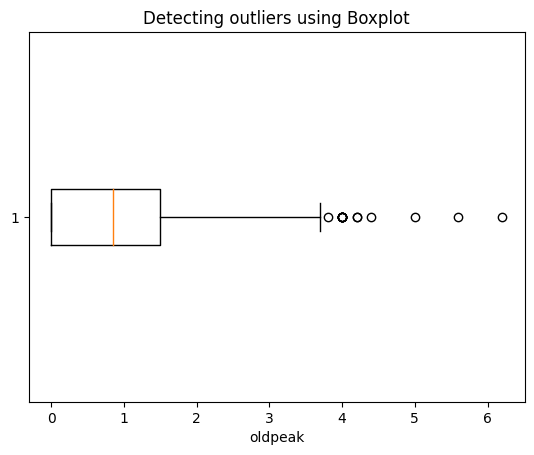

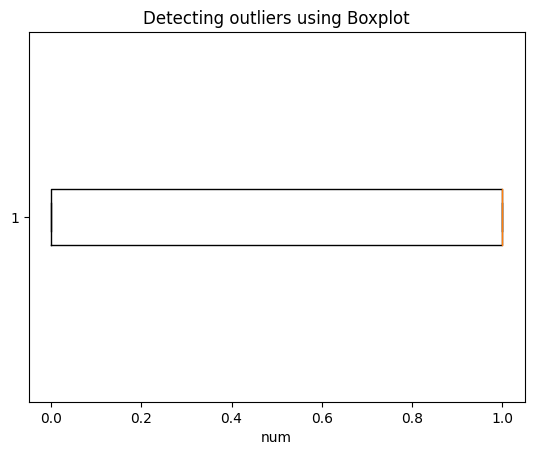

In [35]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [36]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers

In [37]:
for i in dict(df.dtypes):
 outliers = []
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(df[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(df[i])
   for j in sample_outliers:
    df[i] = np.where(df[i]==j, median, df[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(df[i])
   print("Outliers from Z-scores method: ", sample_outliers)

Column:  age
Outliers from Z-scores method:  []
Column:  trestbps
Outliers from Z-scores method:  [196, 200, 200, 200, 200, 0, 196]
After treatment: 
Outliers from Z-scores method:  [193.0, 192.0, 192.0, 193.0]
Column:  chol
Outliers from Z-scores method:  [564, 603]
After treatment: 
Outliers from Z-scores method:  []
Column:  thalch
Outliers from Z-scores method:  []
Column:  oldpeak
Outliers from Z-scores method:  [4.2, 5.0, 6.2, 5.6, 4.2, 4.4]
After treatment: 
Outliers from Z-scores method:  [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Column:  num
Outliers from Z-scores method:  []


In [38]:
cols=['sex','cp','fbs','restecg','exang','slope','thal']
label_encoder = preprocessing.LabelEncoder()
for i in cols:
  df[i]= label_encoder.fit_transform(df[i])

In [39]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,int64
restecg,int64
thalch,int64
exang,int64
oldpeak,float64


In [40]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


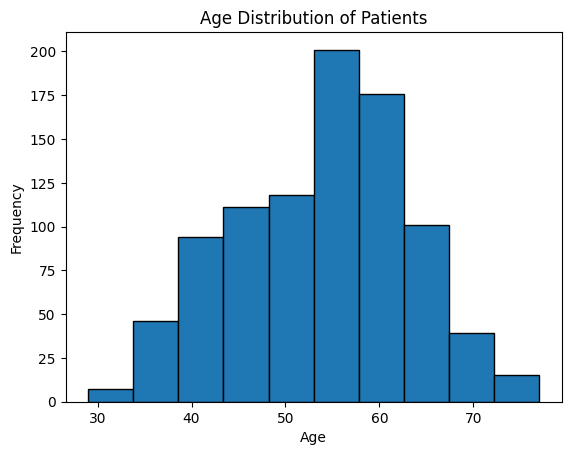

In [41]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


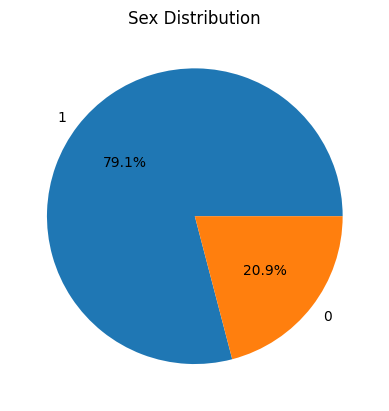

In [42]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

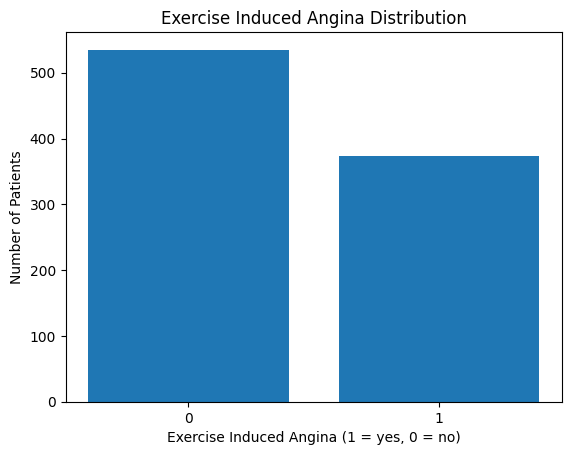

In [43]:
exang_count = df['exang'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

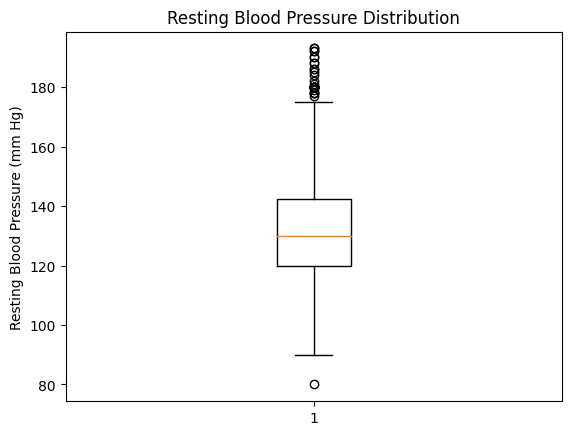

In [44]:
plt.boxplot(df['trestbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

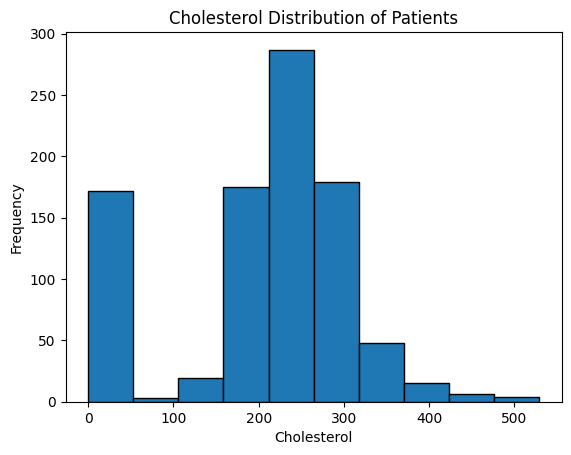

In [45]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

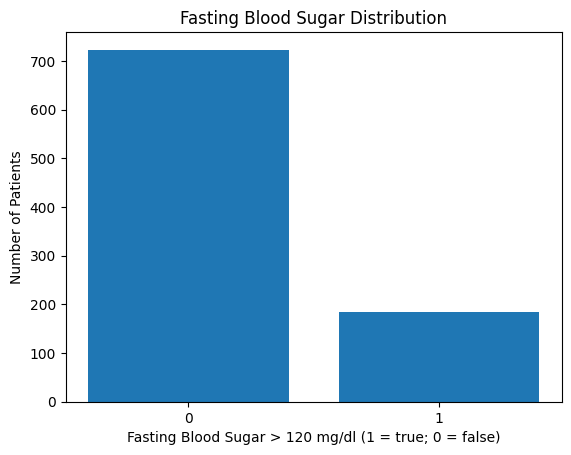

In [46]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

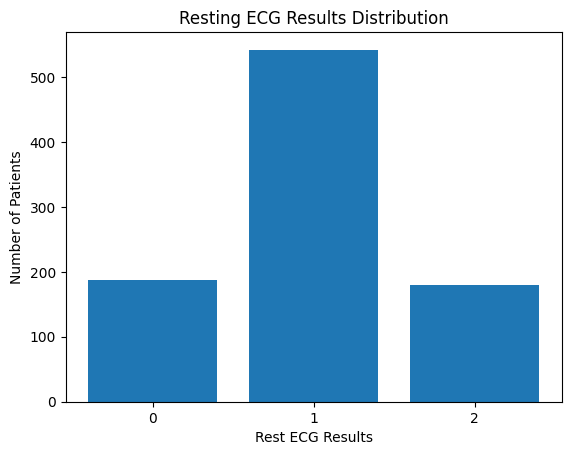

In [47]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

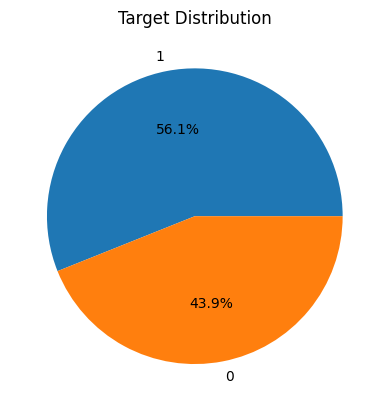

In [48]:
target_count = df['num'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

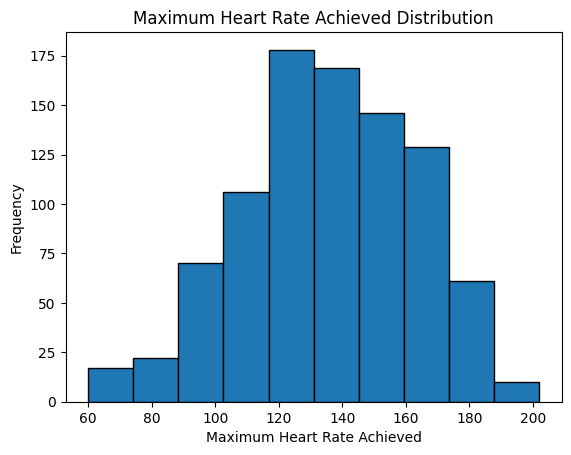

In [49]:
plt.hist(df['thalch'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

In [50]:
df.nunique()

,0
age,49
sex,2
cp,4
trestbps,82
chol,226
fbs,2
restecg,3
thalch,122
exang,2
oldpeak,40


In [51]:
df['exang'].unique()

array([0, 1])

In [52]:
data = df.copy()
categorical_columns = ['sex','cp','restecg','slope','thal','exang']
numerical_columns = ['age','trestbps','chol','fbs','thalch','oldpeak']
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [53]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [54]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

In [55]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [56]:
dummy_variables.columns

Index(['num', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'exang_0', 'exang_1'],
      dtype='object')

In [57]:
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [58]:
type(processed_df)

pandas.core.frame.DataFrame

In [59]:
data=processed_df

In [60]:
type(data)

pandas.core.frame.DataFrame

In [61]:
X = data.drop('num', axis=1)
y = data['num']

In [62]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.02918113 0.02747929 0.11159469 0.05921949 0.02618544 0.01312956
 0.0180645  0.0208891  0.01819347 0.01422382 0.02199459 0.0216122
 0.01592753 0.02596714 0.02183972 0.05343567 0.06030518 0.08267837
 0.07114712 0.09700633 0.03062638 0.07801927 0.08128003]


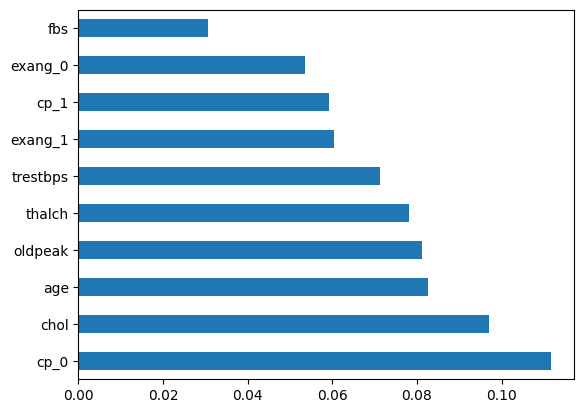

In [63]:
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

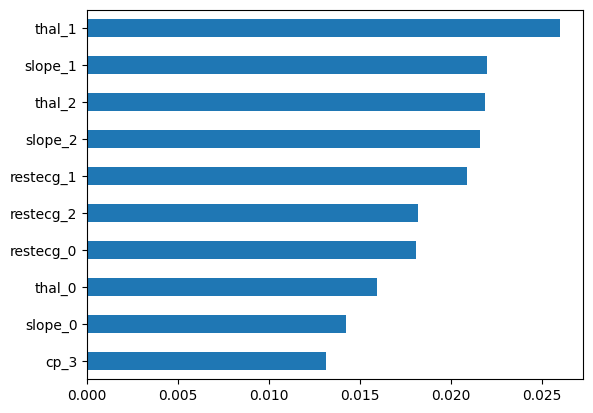

In [64]:
feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

In [65]:
# data.drop(['slope_1','slope_2','restecg_2','restecg_0','thal_0','slope_0','sex_0','sex_1','cp_2','cp_3'],axis=1,inplace=True)

In [66]:
X = data.drop('num', axis=1)
y = data['num']

In [67]:
y.unique()

array([0, 1])

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
data['num']

,num
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, pred))

Accuracy: 0.7857142857142857

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        89
           1       0.81      0.76      0.78        93

    accuracy                           0.79       182
   macro avg       0.79      0.79      0.79       182
weighted avg       0.79      0.79      0.79       182


 confussion matrix:
 [[72 17]
 [22 71]]


In [73]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
'min_samples_split':[5,10,25,50,75,100,125,150,175,200]}

In [74]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1)

In [75]:
print(grid_search.fit(X_train,y_train))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16],
                         'min_samples_split': [5, 10, 25, 50, 75, 100, 125, 150,
                                               175, 200]},
             scoring='accuracy', verbose=1)


In [76]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=2, min_samples_split=5)


In [77]:
best_dt = grid_search.best_estimator_

In [78]:
def check_model(dt):
    print("train confusion matrix : ",confusion_matrix(y_train,dt.predict(X_train)))
    print("train accuracy score : ",accuracy_score(y_train,dt.predict(X_train)))
    print("__"*50)
    print("test confusion matrix : ",confusion_matrix(y_test,dt.predict(X_test)))
    print("test accuracy score : ",accuracy_score(y_test,dt.predict(X_test)))

In [79]:
check_model(best_dt)

train confusion matrix :  [[216  94]
 [ 64 352]]
train accuracy score :  0.7823691460055097
____________________________________________________________________________________________________
test confusion matrix :  [[67 22]
 [18 75]]
test accuracy score :  0.7802197802197802


 What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

 Hyperparameters include the learning rate, regularization strength, and the choice of optimization algorithm. When we define these hyperparameters, the model can control the features of the learning process and possibly impact its performance and behavior.

What is the difference between the Label encoding and One-hot encoding?

Label encoding assigns a unique numerical value to each category, while one-hot encoding creates binary columns for each category, with only one column being “1” and the rest “0” for each observation.